In [1]:
import requests
import json
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import praw
import redditHelperFunctions as rhf

import os
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#read in reddit credentials
# reddit_login is a json file containing credentials for the reddit API.


with open('reddit_login.json','r') as f:
    r_creds = json.load(f)
r = praw.Reddit(
    client_id = r_creds['client_id'],
    client_secret = r_creds['client_secret'],
    password = r_creds['password'],
    user_agent = r_creds['user_agent'],
    username = r_creds['username']
)

In [6]:
rhf.get_submissions('republicans')

                                               title  \
0  If you see any direct threat to the president'...   
1                                            No more   
2              Stop blaming Trump, Looney Lefties...   
3                                           Accurate   
4  So That's Where All The Trump Derangement Synd...   

                                            selftext  score  \
0                                                        53   
1  We the People should call for any member of Co...     39   
2                                                       111   
3                                                        72   
4                                                        57   

          created_utc  
0 2025-02-09 04:36:50  
1 2025-02-04 21:50:05  
2 2025-02-04 15:40:55  
3 2025-01-30 22:20:26  
4 2025-01-27 02:56:58  


,title,selftext,score,created_utc
0,If you see any direct threat to the president'...,,53,2025-02-09 04:36:50
1,No more,We the People should call for any member of Co...,39,2025-02-04 21:50:05
2,"Stop blaming Trump, Looney Lefties...",,111,2025-02-04 15:40:55
3,Accurate,,72,2025-01-30 22:20:26
4,So That's Where All The Trump Derangement Synd...,,57,2025-01-27 02:56:58
...,...,...,...,...
994,This is the Party of Reagan and Lincoln,I'm too proud of our heritage of making Americ...,89,2016-03-09 16:48:35
995,Hello From The_Donald,,154,2016-03-09 16:20:40
996,Carly Fiorina endorses Ted Cruz – What Could T...,,62,2016-03-09 16:09:08
997,So THAT'S why there is Think Progress bile all...,,46,2013-02-26 18:19:21


In [12]:
r.subreddit('republicans').hot(limit=10)

In [15]:
data = r.subreddits.search('republicans')
print(data)

                                               title selftext  score  \
0  A Well-Informed Electorate Is a Prerequisite f...            2564   
1  Here's the ultimatum I gave my Republican memb...            2308   
2  Pete Buttigieg Urges Democrats to Remember The...            3472   
3            He ruins everything, everywhere he goes            7453   
4                     I may not watch the game today            3019   

          created_utc  
0 2025-02-10 14:55:32  
1 2025-02-10 10:05:14  
2 2025-02-10 04:00:04  
3 2025-02-10 02:51:34  
4 2025-02-09 20:50:19  
                                               title  \
0                         They sure are mad at Elon.   
1                               You heard me Reddit.   
2  NCAA Officially Bans Trans Athletes After Trum...   
3            Biggest upgrade in political history? 🔥   
4                 Columbia caved in under an hour 😂😂   

                                   selftext  score         created_utc  
0            

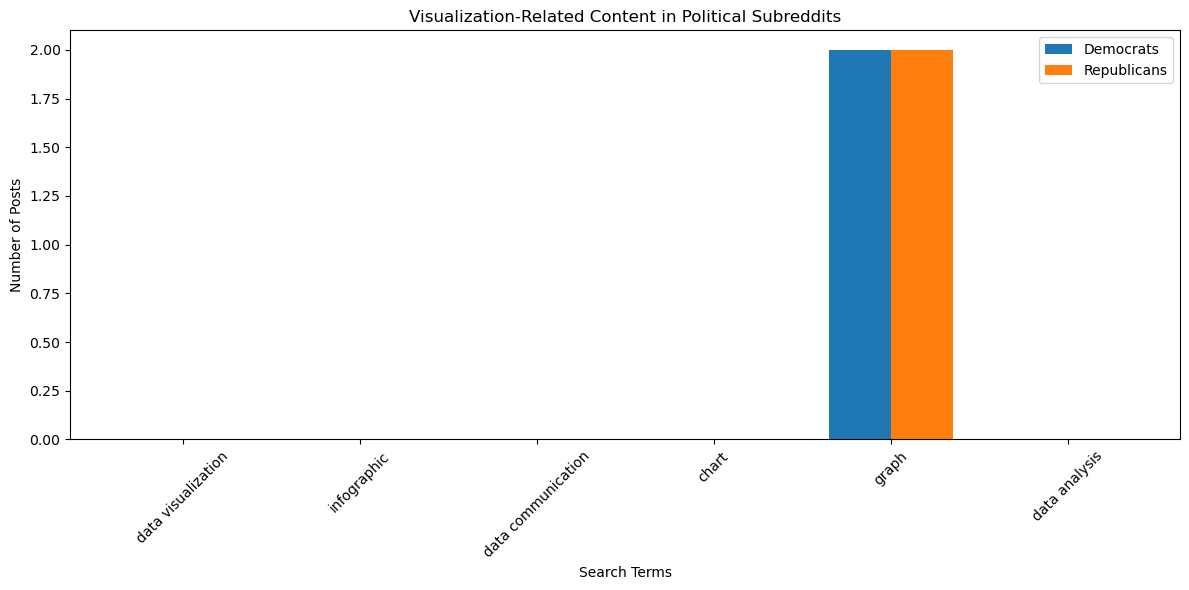

In [8]:
# Search terms related to visualization and data communication
search_terms = [
    "data visualization",
    "infographic",
    "data communication",
    "chart",
    "graph",
    "data analysis"
]

# Initialize dictionaries to store results
dem_results = {}
rep_results = {}

# Get submissions from both subreddits
dem_submissions = rhf.get_submissions('democrats', limit=1000)
rep_submissions = rhf.get_submissions('republican', limit=1000)

# Function to search submissions for terms
def search_submissions(df, terms):
    results = {}
    for term in terms:
        mask = (
            df['title'].str.contains(term, case=False, na=False) |
            df['selftext'].str.contains(term, case=False, na=False)
        )
        results[term] = df[mask]
    return results

# Search in both subreddits
dem_results = search_submissions(dem_submissions, search_terms)
rep_results = search_submissions(rep_submissions, search_terms)

# Create a summary DataFrame
summary_data = []
for term in search_terms:
    dem_count = len(dem_results[term])
    rep_count = len(rep_results[term])
    summary_data.append({
        'term': term,
        'democrats_count': dem_count,
        'republican_count': rep_count,
        'democrats_avg_score': dem_results[term]['score'].mean() if dem_count > 0 else 0,
        'republican_avg_score': rep_results[term]['score'].mean() if rep_count > 0 else 0
    })

summary_df = pd.DataFrame(summary_data)
print("\nSummary of visualization-related content:")
print(summary_df)

# Create a visualization of the results
plt.figure(figsize=(12, 6))
x = np.arange(len(search_terms))
width = 0.35

plt.bar(x - width/2, summary_df['democrats_count'], width, label='Democrats')
plt.bar(x + width/2, summary_df['republican_count'], width, label='Republicans')

plt.xlabel('Search Terms')
plt.ylabel('Number of Posts')
plt.title('Visualization-Related Content in Political Subreddits')
plt.xticks(x, search_terms, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
summary_df

,term,democrats_count,republican_count,democrats_avg_score,republican_avg_score
0,data visualization,0,0,0.0,0.0
1,infographic,0,0,0.0,0.0
2,data communication,0,0,0.0,0.0
3,chart,0,0,0.0,0.0
4,graph,2,2,2019.0,1217.0
5,data analysis,0,0,0.0,0.0



Engagement Statistics:
           score                                  created_utc  \
           count     mean  median     std                 min   
subreddit                                                       
democrats     29  2819.07  2643.0  875.23 2018-06-24 01:24:28   
republican    13  1149.00  1178.0  186.25 2020-06-20 02:06:25   

                                
                           max  
subreddit                       
democrats  2024-11-05 21:47:54  
republican 2022-06-15 15:32:06  


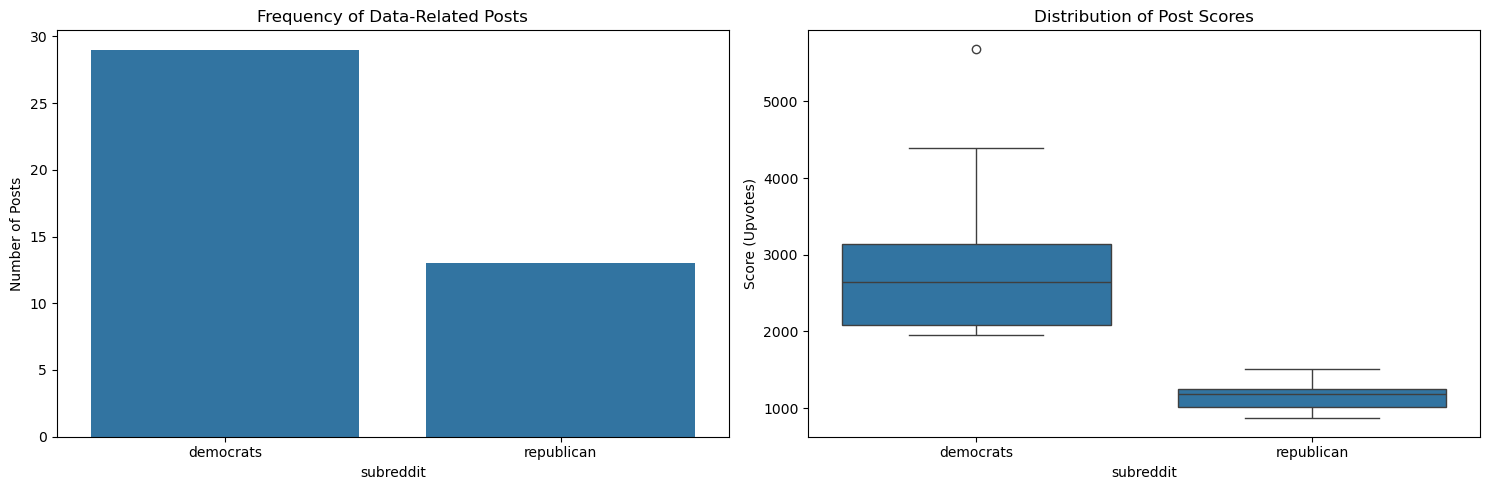

<Figure size 1500x500 with 0 Axes>

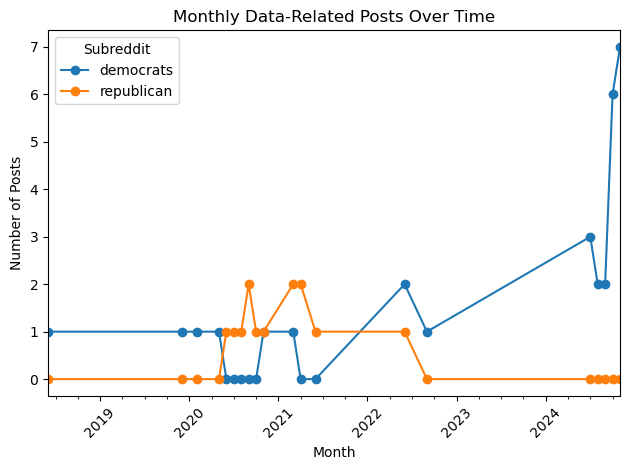

In [26]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
def load_corpus_data(base_dir='text'):
    data = []
    
    # Data-related keywords to search for
    data_keywords = [
        'data', 'visualization', 'graph', 'chart', 'infographic', 
        'statistics', 'poll', 'survey', 'analysis', 'trend'
    ]
    
    # Load data from both subreddits
    for subreddit in ['democrats', 'republican']:
        subreddit_dir = os.path.join(base_dir, subreddit)
        
        for filename in os.listdir(subreddit_dir):
            if filename.endswith('.json'):
                with open(os.path.join(subreddit_dir, filename), 'r', encoding='utf-8') as f:
                    post = json.load(f)
                    
                    # Check if post contains data-related keywords
                    text_content = (post['title'] + ' ' + post['text']).lower()
                    contains_data = any(keyword in text_content for keyword in data_keywords)
                    
                    if contains_data:
                        data.append({
                            'subreddit': post['subreddit'],
                            'created_utc': datetime.fromisoformat(post['created_utc']),
                            'score': post['score'],
                            'title': post['title']
                        })
    
    return pd.DataFrame(data)

def analyze_engagement(df):
    # Analyze and plot results
    # Basic statistics
    stats = df.groupby('subreddit').agg({
        'score': ['count', 'mean', 'median', 'std'],
        'created_utc': ['min', 'max']
    }).round(2)
    
    print("\nEngagement Statistics:")
    print(stats)
    
    # Create visualizations
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Post frequency
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='subreddit')
    plt.title('Frequency of Data-Related Posts')
    plt.ylabel('Number of Posts')
    
    # Plot 2: Engagement distribution
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='subreddit', y='score')
    plt.title('Distribution of Post Scores')
    plt.ylabel('Score (Upvotes)')
    
    plt.tight_layout()
    plt.show()

    
    # Time series analysis
    df['month'] = df['created_utc'].dt.to_period('M')
    monthly_posts = df.groupby(['month', 'subreddit']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(15, 5))
    monthly_posts.plot(kind='line', marker='o')
    plt.title('Monthly Data-Related Posts Over Time')
    plt.xlabel('Month')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.legend(title='Subreddit')
    plt.tight_layout()
    plt.show()


df = load_corpus_data()

analyze_engagement(df)